In [1]:
# load the autoreload extension
%reload_ext autoreload
# Set extension to reload modules every time before executing code
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
%matplotlib inline

In [2]:
# Import random forest regressor and multioutput regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [3]:
full_data = np.load('machine_learning_data.npy')
np.random.shuffle(full_data)

In [4]:
X_data = pd.DataFrame(full_data[:,:-5][:5000])
y_data = pd.DataFrame(full_data[:,-5:][:5000])


In [5]:
def plot_corr(pred,test):
    sns.jointplot(pred.iloc[:,0],test.iloc[:,0],kind = "kde")
    sns.jointplot(pred.iloc[:,1],test.iloc[:,1],kind = 'kde',color='purple')
    sns.jointplot(pred.iloc[:,2],test.iloc[:,2],kind = 'kde',color='blue')
    sns.jointplot(pred.iloc[:,3],test.iloc[:,3],kind = 'kde',color='green')
    sns.jointplot(pred.iloc[:,4],test.iloc[:,4],kind = 'kde',color='red')
    plt.tight_layout
    
def plot_error(pred,test,dims=(12,8)):
    fig,ax = plt.subplots(figsize=dims)
    sns.distplot(pred.iloc[:,0]-test.iloc[:,0],color='blue',ax=ax,kde_kws={"label": "M_cut"})
    sns.distplot(pred.iloc[:,1]-test.iloc[:,1],color='cyan',ax=ax,kde_kws={"label": "M_1"})
    sns.distplot(pred.iloc[:,2]-test.iloc[:,2],color='purple',ax=ax,kde_kws={"label": "Sigma"})
    sns.distplot(pred.iloc[:,3]-test.iloc[:,3],color='yellow',ax=ax,kde_kws={"label": "Kappa"})
    sns.distplot(pred.iloc[:,4]-test.iloc[:,4],color='red',ax=ax,kde_kws={"label": "Alpha"})

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1,random_state=42)

In [7]:
#fit Random Forest Regressor

reg_rf = RandomForestRegressor(
    n_estimators=3000,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=False,
    oob_score=False,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=False,
)

reg_rf.fit(X_train,y_train)
y_rf = reg_rf.predict(X_test)


In [8]:
reg_rf.score(X_test,y_test)

/home/ajana/anaconda3/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


-0.19514953030673274

In [9]:
print (np.mean((y_rf - y_test)/(y_test)*100, axis=0))

0   -0.029399
1    0.011136
2    0.408162
3    4.975153
4    0.729305
dtype: float64


In [10]:
y_rf = pd.DataFrame(y_rf)

y_test.reset_index(drop=True, inplace=True)
y_rf.reset_index(drop=True, inplace=True)


In [11]:
pd.concat([y_test,y_rf] ,axis = 1)

,0,1,2,3,4,0,1,2,3,4
0,13.197961,14.052878,0.977714,1.107503,0.749301,13.234469,14.061832,1.008598,0.779665,0.790214
1,13.117228,13.986623,1.183237,1.390416,0.817348,13.072343,14.040164,1.065792,1.339201,0.865561
2,12.966088,14.145969,1.129460,0.834930,0.769656,13.008127,14.093031,1.156329,1.102073,0.792447
3,13.123600,14.020390,1.193301,1.112359,0.946734,12.992576,14.051799,0.919346,1.144208,0.984670
4,13.032066,13.990036,1.180378,1.338594,0.737078,12.997969,14.038450,1.099579,1.000149,0.860085
...,...,...,...,...,...,...,...,...,...,...
495,13.144447,14.123607,1.147583,1.311458,0.806476,13.149173,14.056812,1.147323,1.145654,0.909910
496,13.218323,14.031586,1.040379,1.193288,0.712301,13.173888,14.074051,1.009186,1.472255,0.762946
497,13.106805,13.966121,1.094939,1.241173,0.970726,13.087691,14.076153,1.074955,1.098214,0.944138
498,13.035226,14.146806,1.175804,0.760484,0.880369,12.995882,14.108608,1.125851,1.465385,0.880687


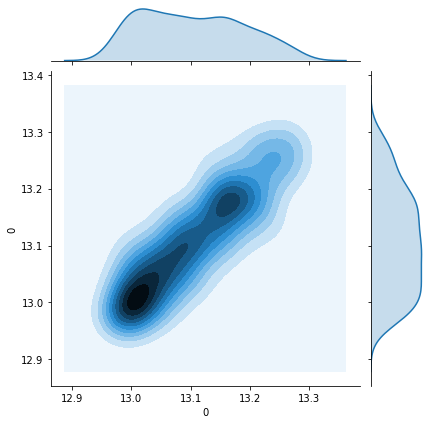

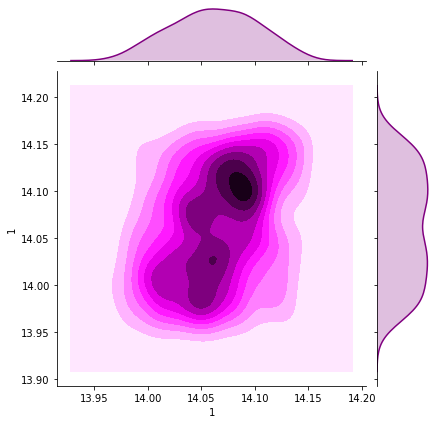

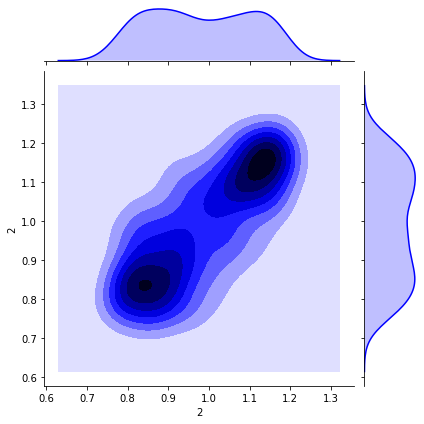

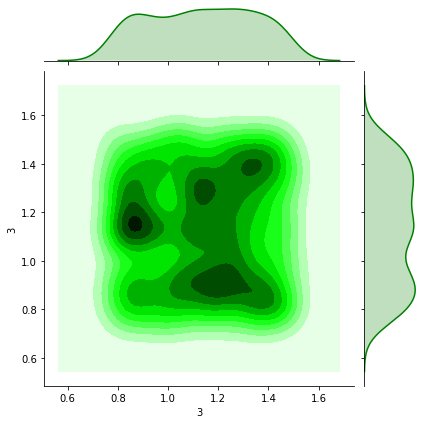

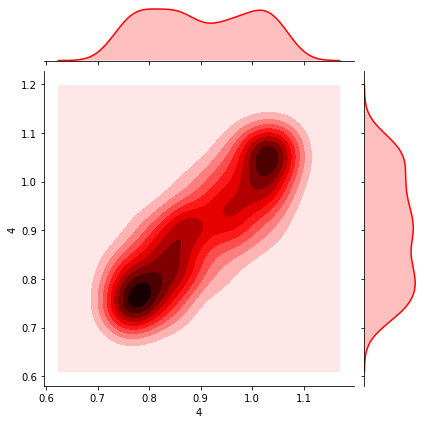

In [12]:
plot_corr(y_rf,y_test)

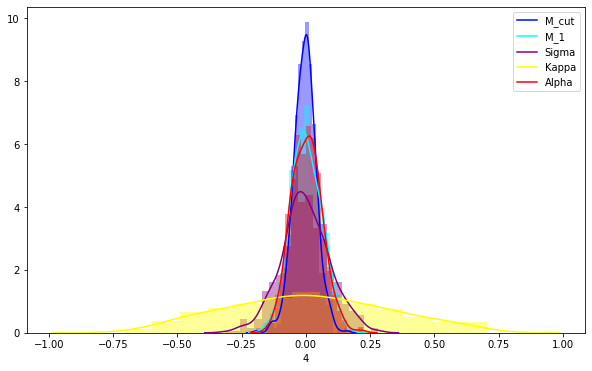

In [13]:
plot_error(y_rf,y_test,dims=(10,6))

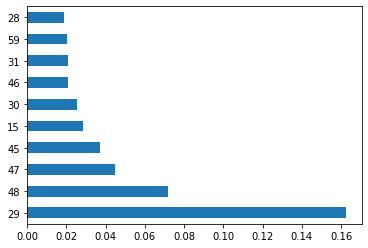

In [14]:
feat_importances = pd.Series(reg_rf.feature_importances_, index=X_data.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [15]:
feat_importances.nlargest(4)

29    0.162371
48    0.071595
47    0.044818
45    0.037108
dtype: float64

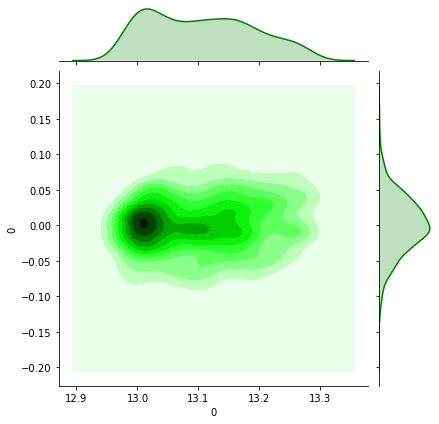

In [16]:
sns.jointplot(y_rf.iloc[:,0],y_rf.iloc[:,0]-y_test.iloc[:,0],kind = 'kde',color='green')

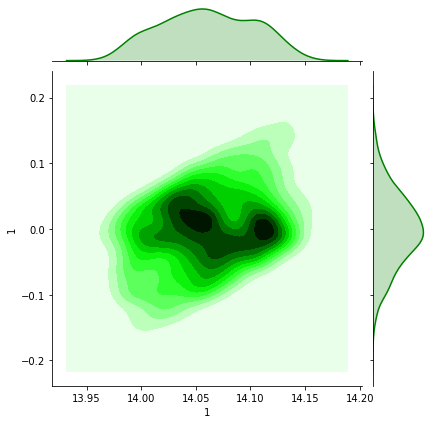

In [17]:
sns.jointplot(y_rf.iloc[:,1],y_rf.iloc[:,1]-y_test.iloc[:,1],kind = 'kde',color='green')

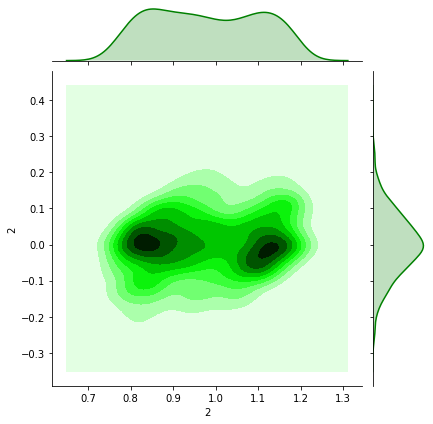

In [18]:
sns.jointplot(y_rf.iloc[:,2],y_rf.iloc[:,2]-y_test.iloc[:,2],kind = 'kde',color='green')

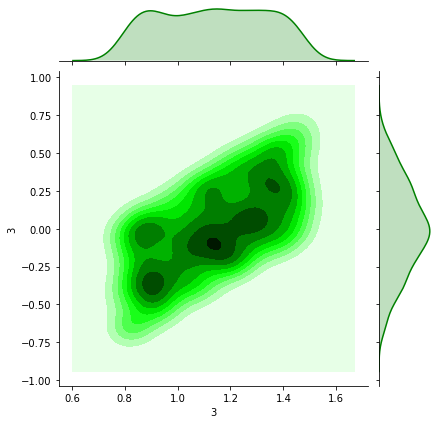

In [19]:
sns.jointplot(y_rf.iloc[:,3],y_rf.iloc[:,3]-y_test.iloc[:,3],kind = 'kde',color='green')

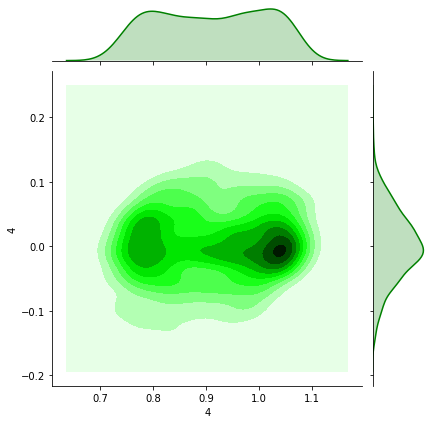

In [20]:
sns.jointplot(y_rf.iloc[:,4],y_rf.iloc[:,4]-y_test.iloc[:,4],kind = 'kde',color='green')

In [16]:
from xgboost import XGBRegressor

#fit multioutput regressor
multioutputregressor = MultiOutputRegressor(XGBRegressor(max_depth=1000,n_estimators=10000, 
                                                         learning_rate=0.05,
                                                         objective = 'reg:squarederror',
                                                         booster='gbtree',
                                                         n_jobs=-1,verbosity=1))
multioutputregressor.fit(X_train, y_train)
# predicting
y_multirf = multioutputregressor.predict(X_test)


In [17]:
print (np.mean((y_multirf - y_test)*100/(y_test), axis=0))
multioutputregressor.score(X_test,y_test)

0   -0.030430
1   -0.027281
2   -0.428709
3    3.632901
4    0.100389
dtype: float64


0.643623637507864

In [18]:
y_multirf = pd.DataFrame(y_multirf)
y_multirf.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [19]:
# Root Mean Squared error

print("y1 MSE:%.4f" % np.sqrt(mean_squared_error(y_test.iloc[:,0], y_multirf.iloc[:,0]))) 
print("y2 MSE:%.4f" % np.sqrt(mean_squared_error(y_test.iloc[:,1], y_multirf.iloc[:,1])))
print("y3 MSE:%.4f" % np.sqrt(mean_squared_error(y_test.iloc[:,2], y_multirf.iloc[:,2]))) 
print("y4 MSE:%.4f" % np.sqrt(mean_squared_error(y_test.iloc[:,3], y_multirf.iloc[:,3])))
print("y5 MSE:%.4f" % np.sqrt(mean_squared_error(y_test.iloc[:,4], y_multirf.iloc[:,4]))) 

y1 MSE:0.0259
y2 MSE:0.0360
y3 MSE:0.0551
y4 MSE:0.2358
y5 MSE:0.0255


In [20]:
pd.concat([y_test,y_multirf], axis = 1)

,0,1,2,3,4,0,1,2,3,4
0,13.197961,14.052878,0.977714,1.107503,0.749301,13.174289,14.048293,0.937356,1.041072,0.781670
1,13.117228,13.986623,1.183237,1.390416,0.817348,13.066668,14.029953,1.081529,1.062864,0.848136
2,12.966088,14.145969,1.129460,0.834930,0.769656,12.982964,14.113303,1.179889,1.108546,0.756999
3,13.123600,14.020390,1.193301,1.112359,0.946734,13.087417,14.028872,1.154955,1.061075,0.972081
4,13.032066,13.990036,1.180378,1.338594,0.737078,13.011891,14.015238,1.135255,1.227631,0.812870
...,...,...,...,...,...,...,...,...,...,...
495,13.144447,14.123607,1.147583,1.311458,0.806476,13.130996,14.054927,1.127107,1.028810,0.793846
496,13.218323,14.031586,1.040379,1.193288,0.712301,13.200739,14.048400,0.987609,1.055562,0.757232
497,13.106805,13.966121,1.094939,1.241173,0.970726,13.113493,14.038473,1.122200,1.120435,0.989873
498,13.035226,14.146806,1.175804,0.760484,0.880369,13.021840,14.117390,1.149934,1.231034,0.853088


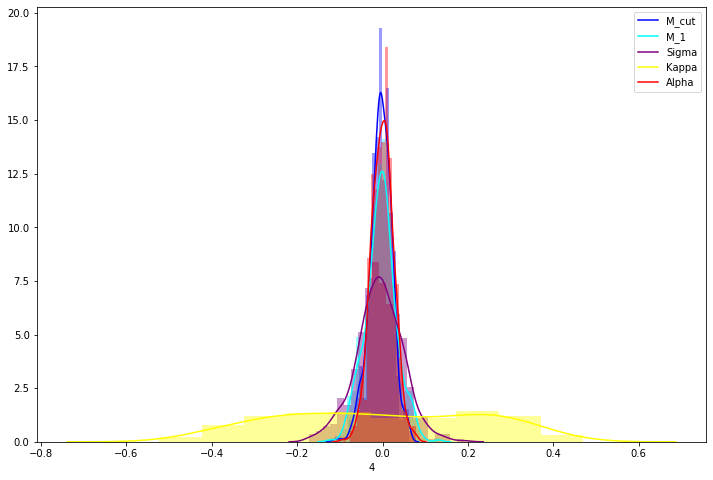

In [21]:
plot_error(y_multirf,y_test)

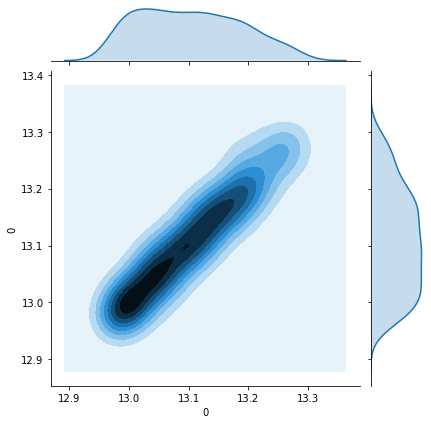

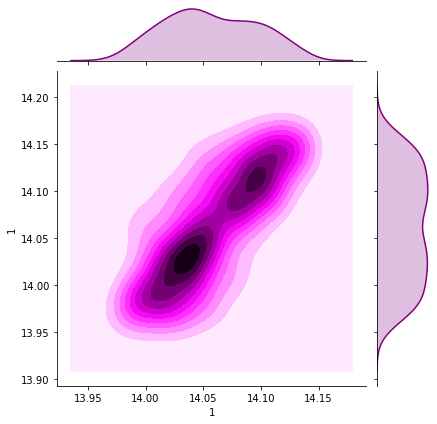

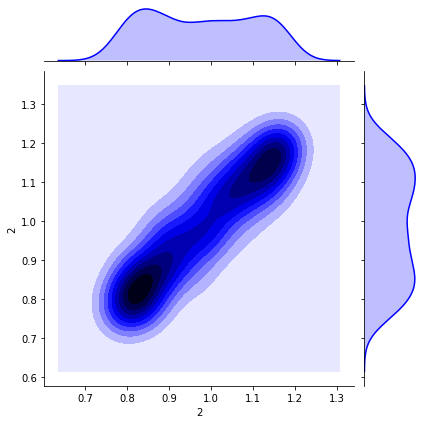

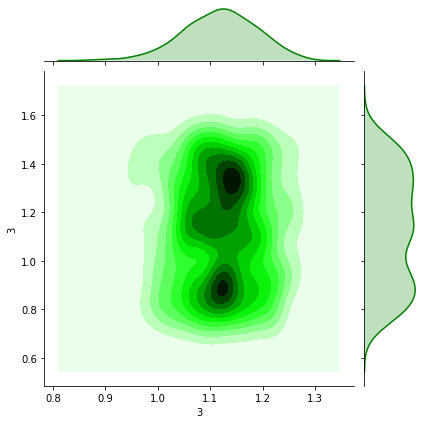

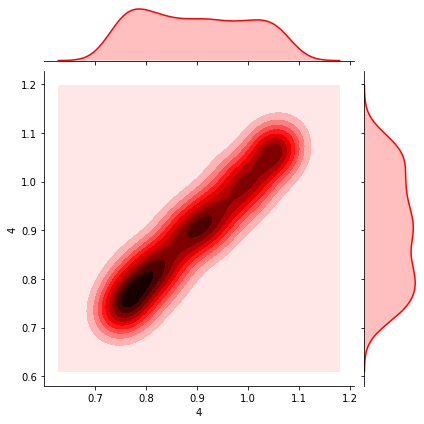

In [22]:
plot_corr(y_multirf,y_test)

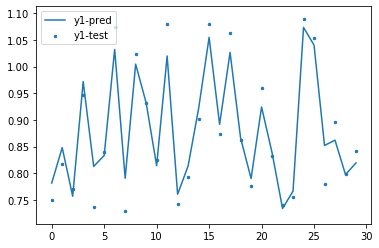

In [26]:
x_ax = range(len(X_test))
plt.scatter(x_ax[:30], y_test.iloc[:30,4],  s=6, label="y1-test")
plt.plot(x_ax[:30], y_multirf.iloc[:30,4], label="y1-pred")
#plt.scatter(x_ax[:20], y_test.iloc[:20,4],  s=6, label="y2-test")
#plt.plot(x_ax[:20], y_multirf.iloc[:20,4], label="y2-pred")
plt.legend()
plt.show()

In [29]:
'''
#from sklearn.model_selection import GridSearchCV
parameters = {"n_estimators":[i for i in range(50,2000,50)],
    "max_depth":[None,200,250,300],
    "min_samples_split":[2],
    "max_features":('auto','sqrt','log2'),
    "bootstrap":[True,False],
    "oob_score":[True,False]}

clf = GridSearchCV(reg_rf, parameters,n_jobs=-1 ,cv=5)
clf.fit(X_train,y_train)
'''

'\n#from sklearn.model_selection import GridSearchCV\nparameters = {"n_estimators":[i for i in range(50,2000,50)],\n    "max_depth":[None,200,250,300],\n    "min_samples_split":[2],\n    "max_features":(\'auto\',\'sqrt\',\'log2\'),\n    "bootstrap":[True,False],\n    "oob_score":[True,False]}\n\nclf = GridSearchCV(reg_rf, parameters,n_jobs=-1 ,cv=5)\nclf.fit(X_train,y_train)\n'

In [30]:
#sorted(clf.cv_results_.keys())

In [31]:
#grid = clf.predict(X_test)
#print (np.mean((grid - y_test)**2/(grid**2), axis=0))